In [3]:
%load_ext autoreload
%autoreload 1
%aimport datafactory.core
%aimport datafactory.rdf
%aimport datafactory.hist

# test of RDFStaff
import ROOT as R
from datafactory.rdf import RDFStaff, CutFlow
from datafactory.core import StaffType

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## RDFStaff

In [4]:
data = RDFStaff(name = r"$\text{Data}$", 
                path="/Users/cheyuzhi/besfs5/data/HadTauAlg/selection/4260/optimize/pipi0/data.root",
                tree_name="evt", pre_cut_tree_name="cut_evt", pre_cut_names=["N0", "N1", "N2", "N3"],
                type=StaffType.data)

cut = CutFlow('cut', {}, "RecInvMassSq")
data.set_cuts([cut])
data.get_cut_chain_table()
print(data.type)

def test_get_hist(staff: RDFStaff):
    hist = staff.Histo1D(("","",100,0,3.5),"RecInvMassSq")
    return hist

hist = data.get_hist(test_get_hist)
c = R.TCanvas()
hist.DrawClone()
c.DrawClone()

data.save("evt", "./a.root", ["RecInvMassSq"])
!rootls ./a.root

StaffType.data
cut_evt  evt


## HistStaff

In [5]:
from datafactory.hist import HistStaff
data_hist = HistStaff(name="data", type=StaffType.data, histogram=hist)

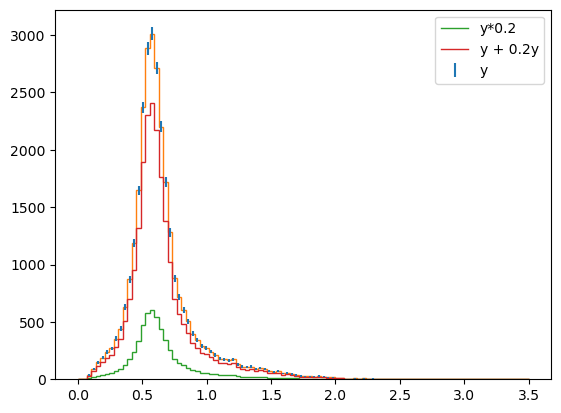

Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created


In [6]:
import matplotlib.pyplot as plt

x,y,yerr, xedge = data_hist.get_numpy()

times_test = data_hist * 0.2
x2, y2, yerr2, xedge2 = times_test.get_numpy()

sum_test = data_hist - times_test
x3, y3, yerr3, xedge3 = sum_test.get_numpy()

plt.errorbar(x = x, y = y, yerr = yerr, ls = "", label = "y")
plt.stairs(y, xedge)

plt.stairs(y2, xedge2, label = "y*0.2")

plt.stairs(y3, xedge3, label = "y + 0.2y")
plt.legend()
plt.show()

## RDFFactory

In [7]:
# test of RDFStaff
import ROOT as R
from datafactory.rdf import RDFFactory, CutFlow
from datafactory.core import StaffType

# Retrieve the cross-section and luminosity for the given data set from a user defined list.
# datainfo = DataInfo(cms_energy = float(cms_energy)/u.MeV, 
#                     luminosity = luminosity * u.invnb / u.invpb,
#                     path = root_input,
#                     mc_process = [r"q\bar{q} ~\mathrm{Hybrid}"])

# Create a McSamples object for Monte Carlo samples with paths, cross-section, luminosity, and precut tree name.
mc = RDFFactory(
        path_dict = {
            r"q\bar{q} ~\mathrm{Hybrid}": "/Users/cheyuzhi/besfs5/data/HadTauAlg/selection/4260/optimize/pipi0/MC/qq/inc/*.root",
            r"q\bar{q} ~\mathrm{Legacy}": "/Users/cheyuzhi/besfs5/data/HadTauAlg/selection/4260/optimize/pipi0/MC/qq/inc/*.root"
            },
        xsec_dict = {
            r"q\bar{q} ~\mathrm{Hybrid}": 20,
            r"q\bar{q} ~\mathrm{Legacy}": 20
            },
        luminosity = 583, 
        pre_cut_tree_name = "cut_evt",
        classify_dict={
            r"q\bar{q} ~\mathrm{Hybrid}": "MCGenPDG.size() >= 10",
            r"q\bar{q} ~\mathrm{Legacy}": "MCGenPDG.size() < 10"
        },
        type_dict = {
            r"q\bar{q} ~\mathrm{Hybrid}": StaffType.signal,
            r"q\bar{q} ~\mathrm{Legacy}": StaffType.background
        })

In [26]:
print(mc.get_weights(), mc.type_dict)

cut = CutFlow('cut', {}, "RecInvMassSq > 2")
mc.set_cuts([cut])
table = mc.get_cut_chain_table()
print(table)
def test_get_hist(staff):
    hist = staff.Histo1D(("","",100,0,3.5),"RecInvMassSq")
    return hist

hist = mc.get_hist(test_get_hist)
c = R.TCanvas()
for i in hist.values():
    i.DrawClone("same")
    # break
c.BuildLegend()
c.DrawClone()


{'q\\bar{q} ~\\mathrm{Hybrid}': 0.0002377161310578368, 'q\\bar{q} ~\\mathrm{Legacy}': 0.0002377161310578368} {'q\\bar{q} ~\\mathrm{Hybrid}': <StaffType.signal: 1>, 'q\\bar{q} ~\\mathrm{Legacy}': <StaffType.background: 2>}
                                  N0           N1           N2         N3  \
$q\bar{q} ~\mathrm{Hybrid}$  11660.0  3881.590159  3726.836007  25.267323   
$q\bar{q} ~\mathrm{Legacy}$  11660.0  3881.590159  3726.836007  25.267323   
Sum                          23320.0  7763.180319  7453.672015  50.534646   

                                 a_pre     b_mupi  c_Channel  d_IsoPhoton  \
$q\bar{q} ~\mathrm{Hybrid}$  25.267323  15.892037   1.623839     0.091996   
$q\bar{q} ~\mathrm{Legacy}$  25.267323  15.892037   1.623839     0.091996   
Sum                          50.534646  31.784073   3.247678     0.183992   

                                  cut  
$q\bar{q} ~\mathrm{Hybrid}$  0.011648  
$q\bar{q} ~\mathrm{Legacy}$  0.012837  
Sum                          0.024485  


/var/folders/bk/sdrvgh793fq12j8rf93zk4ww0000gn/T/ipykernel_25521/3530071952.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


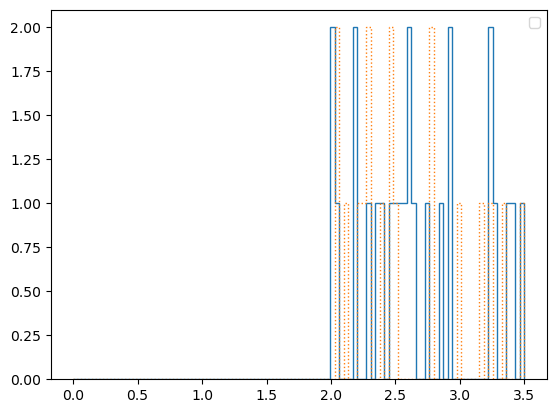

In [27]:
mc_hist = mc.get_histfactory(test_get_hist)

hists_np = mc_hist.get_numpy()
x1,y1,yerr1,xedge1 = hists_np[r"q\bar{q} ~\mathrm{Hybrid}"]
x2,y2,yerr2,xedge2 = hists_np[r"q\bar{q} ~\mathrm{Legacy}"]
plt.stairs(y1, xedge1)
plt.stairs(y2, xedge2, ls = ":")
plt.legend()
plt.show()

In [28]:
mc.save(tree_name="evt", 
               path_dir= {
            r"q\bar{q} ~\mathrm{Hybrid}": "./mc_1.root",
            r"q\bar{q} ~\mathrm{Legacy}": "./mc_2.root"
            },
            var = ["RecInvMassSq"])

Writing file: ./mc_1.root
Writing file: ./mc_2.root


In [29]:
from datafactory.hist import HistFactory
mc_hist = HistFactory(staff_dict = {key: HistStaff(name = key, histogram=val) for key, val in hist.items()},
                      type_dict={
                        r"q\bar{q} ~\mathrm{Hybrid}": StaffType.signal,
                        r"q\bar{q} ~\mathrm{Legacy}": StaffType.background
                    })

In [30]:
mc_hist.save(path="./mc_3.root")
del mc_hist

In [31]:
mc_hist = HistFactory(path_dict = {
    r"q\bar{q} ~\mathrm{Hybrid}": "./mc_3.root",
    r"q\bar{q} ~\mathrm{Legacy}": "./mc_3.root",
                                   },
                      type_dict={
                        r"q\bar{q} ~\mathrm{Hybrid}": StaffType.signal,
                        r"q\bar{q} ~\mathrm{Legacy}": StaffType.background
                    })

Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created


In [32]:
sum_hist = mc_hist.sum(type_list=[StaffType.signal, StaffType.background])

q\bar{q} ~\mathrm{Hybrid} StaffType.signal [<StaffType.signal: 1>, <StaffType.background: 2>]
q\bar{q} ~\mathrm{Legacy} StaffType.background [<StaffType.signal: 1>, <StaffType.background: 2>]


Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created


/var/folders/bk/sdrvgh793fq12j8rf93zk4ww0000gn/T/ipykernel_25521/2139020354.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


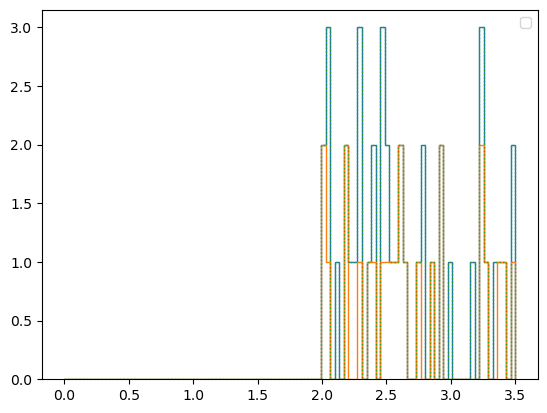

In [33]:
x,y,yerr,xedge = sum_hist.get_numpy()
hists_np = mc_hist.get_numpy()
x1,y1,yerr1,xedge1 = hists_np[r"q\bar{q} ~\mathrm{Hybrid}"]
x2,y2,yerr2,xedge2 = hists_np[r"q\bar{q} ~\mathrm{Legacy}"]
plt.stairs(y,xedge)
plt.stairs(y1,xedge1)
plt.stairs(y2+y1,xedge2, ls = ":")
plt.legend()
plt.show()

In [74]:
mc_hist2 = mc_hist * {
                        r"q\bar{q} ~\mathrm{Hybrid}": 10.,
                        r"q\bar{q} ~\mathrm{Legacy}": 20.
                    }

25.0
250.0
aasda 250.0
18.0
360.0
aasda 360.0


Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created


In [75]:
c = R.TCanvas()
mc_hist2.staff_dict[r"q\bar{q} ~\mathrm{Hybrid}"].histogram.Draw()
c.Draw()

/var/folders/bk/sdrvgh793fq12j8rf93zk4ww0000gn/T/ipykernel_25521/3393410416.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


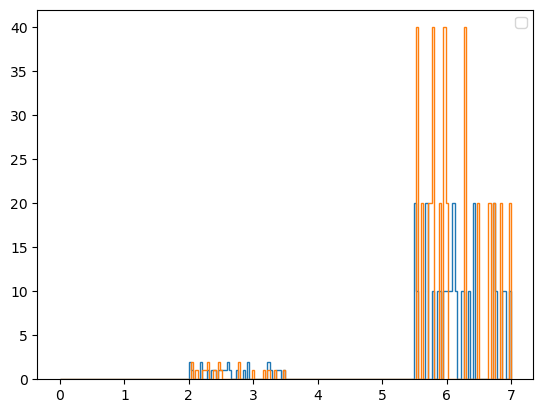

Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created


In [76]:
concatenate_hist = mc_hist.concatenate(mc_hist2)
hists_np = concatenate_hist.get_numpy()
x1,y1,yerr1,xedge1 = hists_np[r"q\bar{q} ~\mathrm{Hybrid}"]
x2,y2,yerr2,xedge2 = hists_np[r"q\bar{q} ~\mathrm{Legacy}"]
plt.stairs(y1,xedge1)
plt.stairs(y2,xedge2)
plt.legend()
plt.show()